In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 75

In [20]:
titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


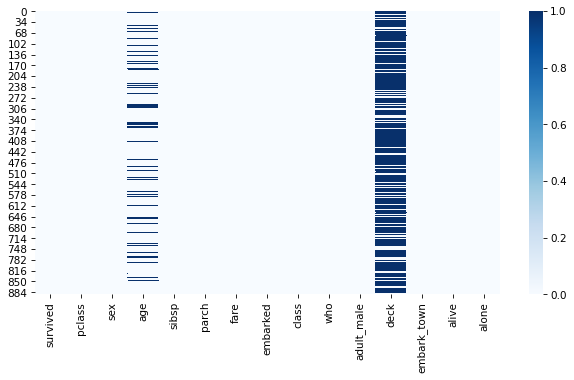

In [21]:
sns.heatmap(titanic.isnull(), cmap = 'Blues', cbar = True)

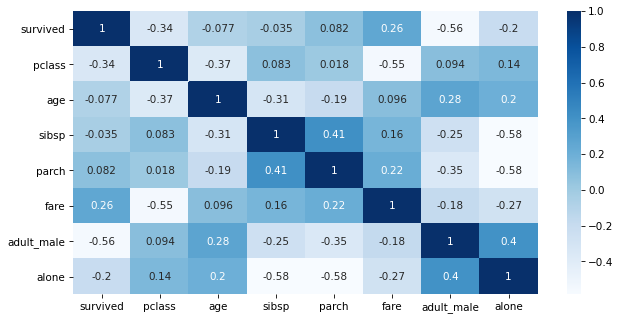

In [22]:
sns.heatmap(titanic.corr(), cmap= 'Blues', cbar = True, annot = True)

# Univariate Analysis

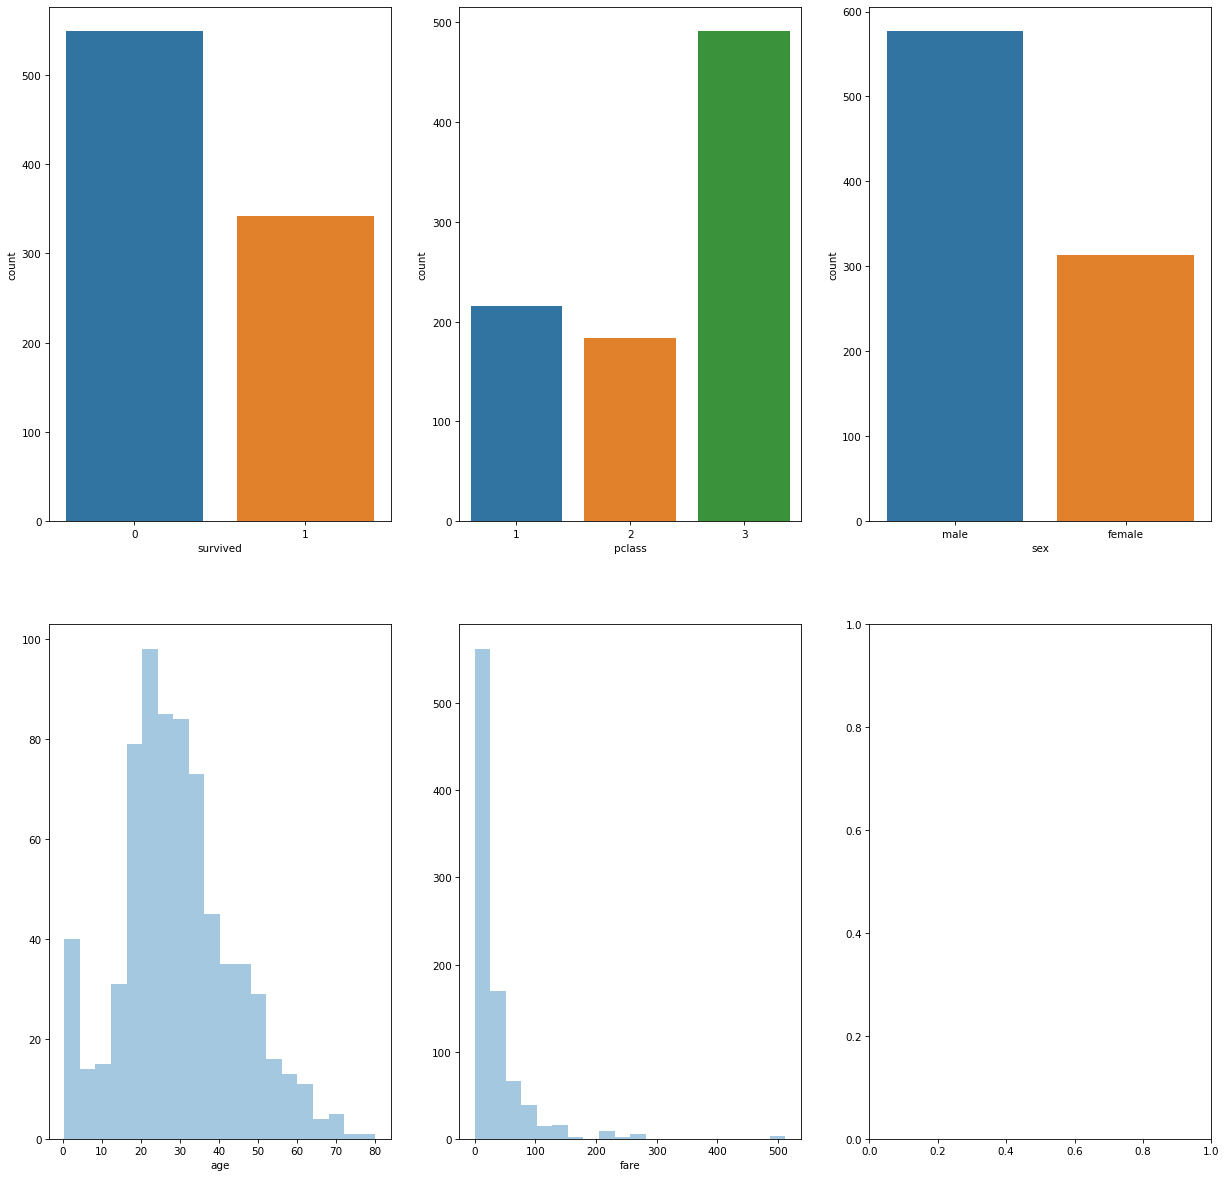

In [40]:
cnv, ax = plt.subplots(2,3,figsize=[20,20])
sns.countplot('survived', data = titanic, ax = ax [0][0])
sns.countplot('pclass',data = titanic,ax = ax [0][1])
sns.countplot('sex',data = titanic,ax = ax [0][2])

sns.distplot(titanic['age'], kde = False, ax = ax [1][0])
sns.distplot(titanic['fare'],kde= False, bins = 20, ax = ax [1][1])

# Survived column analysis

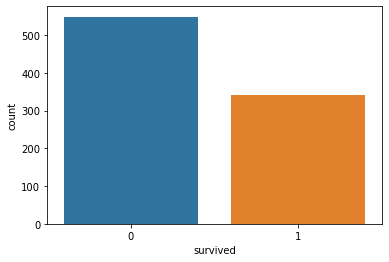

In [8]:
sns.countplot('survived', data = titanic)

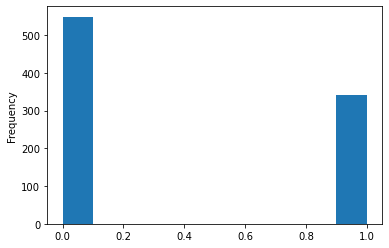

In [9]:
titanic['survived'].plot.hist()

In [12]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

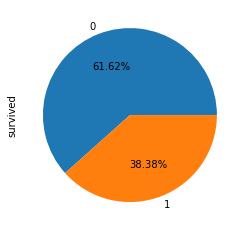

In [14]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

# Passenger class analaysis

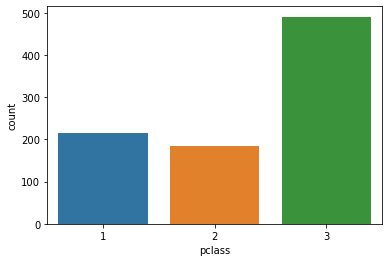

In [17]:
sns.countplot('pclass', data = titanic)

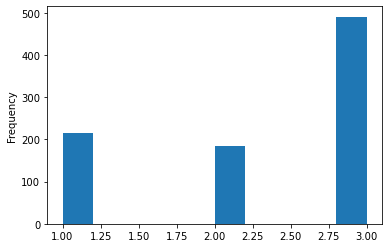

In [18]:
titanic['pclass'].plot.hist()

In [15]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

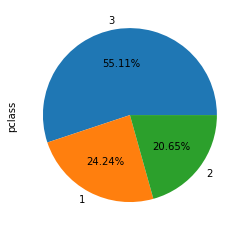

In [19]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.2f%%')

In [22]:
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

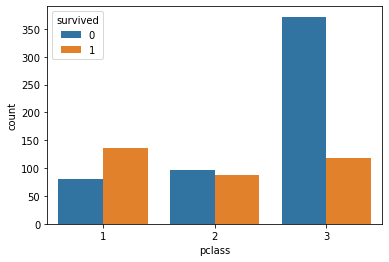

In [24]:
sns.countplot('pclass', data = titanic, hue = 'survived')

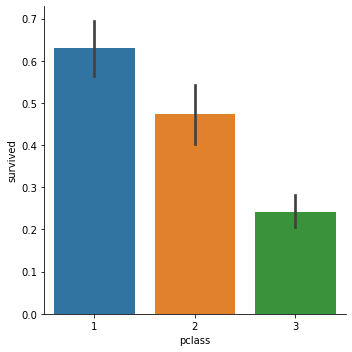

In [26]:
sns.catplot(x= 'pclass', y = 'survived', data = titanic, kind = 'bar')

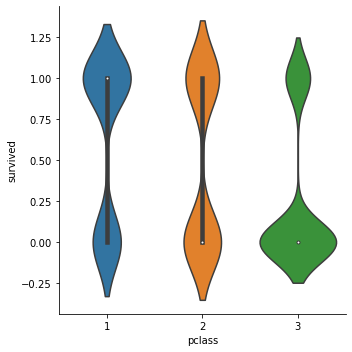

In [29]:
sns.catplot(x= 'pclass', y = 'survived', data = titanic, kind = 'violin')

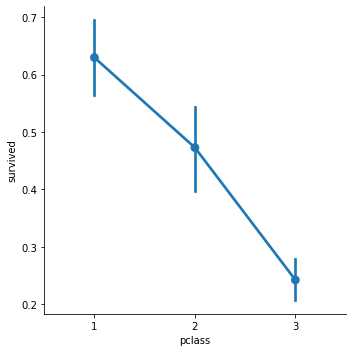

In [30]:
sns.catplot(x= 'pclass', y = 'survived', data = titanic, kind = 'point')